<a href="https://colab.research.google.com/github/komodok/komodok/blob/main/tries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib


Digite um prefixo para sugestões (ou 'sair' para encerrar): a
Sugestões da API: ['a', 'arise', 'awake', 'away', 'acid', 'apple', 'around', 'account', 'art', 'access']
Sugestões da Trie: ['amor', 'amigo', 'amanhã', 'amarelo', 'amplo', 'animal', 'apple', 'application', 'aprender', 'aumento']
Digite um prefixo para sugestões (ou 'sair' para encerrar): am
Sugestões da API: ['amenable', 'ambiguous', 'ambivalent', 'ameliorate', 'amend', 'amazing', 'amiable', 'american', 'amid', 'ambiguity']
Sugestões da Trie: ['amor', 'amigo', 'amanhã', 'amarelo', 'amplo']
Digite um prefixo para sugestões (ou 'sair' para encerrar): amo
Sugestões da API: ['among', 'amount', 'amorphous', 'amongst', 'amorous', 'amoral', 'amok', 'amoeba', 'amor', 'amour']
Sugestões da Trie: ['amor']
Digite um prefixo para sugestões (ou 'sair' para encerrar): amor
Sugestões da API: ['amor', 'amorphous', 'amorous', 'amoral', 'amortize', 'amortization', 'amore', 'amoretto', 'amoroso', 'amorist']
Sugestões da Trie: ['amor']
Digite u

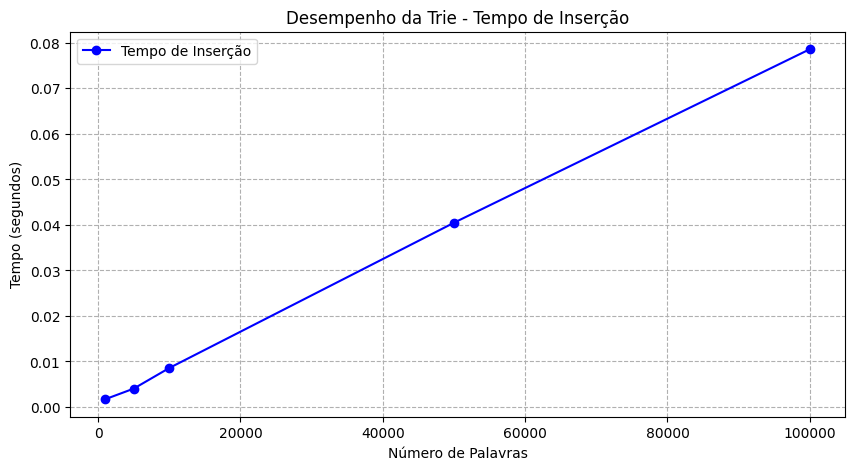

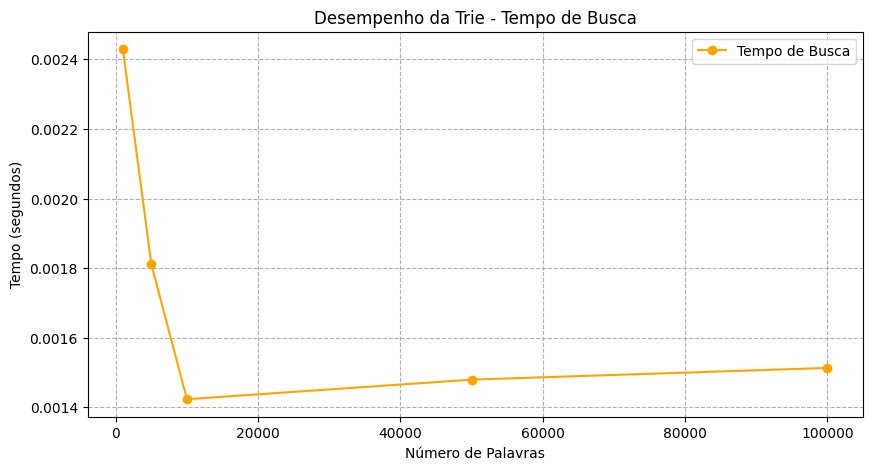

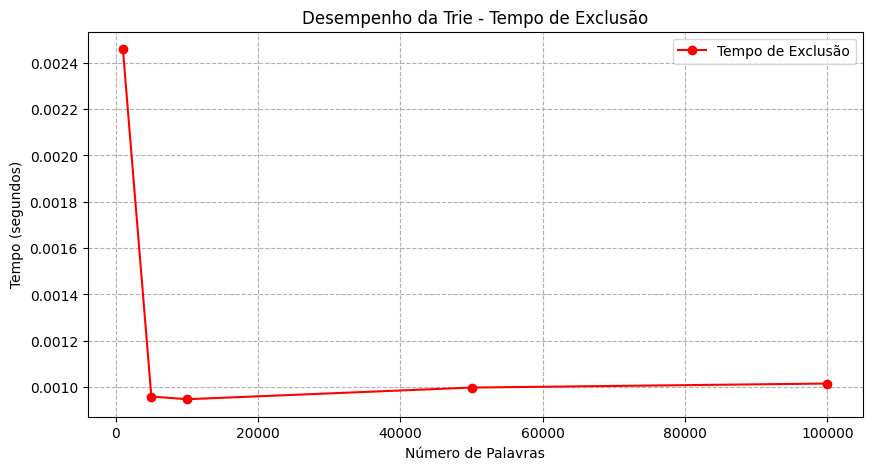

In [2]:
import time
import matplotlib.pyplot as plt
import requests
import random

# Parte 1 - Implementação da Trie
class TrieNode:
    def __init__(self):
        self.children = {}
        self.is_end_of_word = False

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
        node.is_end_of_word = True

    def search(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                return False
            node = node.children[char]
        return node.is_end_of_word

    def starts_with(self, prefix):
        node = self.root
        for char in prefix:
            if char not in node.children:
                return []
            node = node.children[char]
        return self._find_words_with_prefix(node, prefix)

    def _find_words_with_prefix(self, node, prefix):
        results = []
        if node.is_end_of_word:
            results.append(prefix)
        for char, child_node in node.children.items():
            results += self._find_words_with_prefix(child_node, prefix + char)
        return results

    def delete(self, word):
        """ Função para deletar uma palavra da Trie """
        self._delete(self.root, word, 0)

    def _delete(self, node, word, depth):
        if not node:
            return False

        if depth == len(word):
            if node.is_end_of_word:
                node.is_end_of_word = False
            return len(node.children) == 0

        char = word[depth]
        if char in node.children:
            can_delete = self._delete(node.children[char], word, depth + 1)
            if can_delete:
                del node.children[char]
                return len(node.children) == 0

        return False

# Parte 2 - Funções de teste de desempenho
def measure_time(func):
    start_time = time.time()
    result = func()
    end_time = time.time()
    return result, end_time - start_time

# Função para buscar palavras em uma API de dicionário online
def get_suggestions_from_api(prefix):
    url = f"https://api.datamuse.com/sug?s={prefix}&max=10&lang=pt"
    response = requests.get(url)
    if response.status_code == 200:
        suggestions = response.json()
        return [suggestion['word'] for suggestion in suggestions]
    else:
        print("Erro ao acessar a API:", response.status_code)
        return []

# Parte 3 - Função de Autocompletar
def autocomplete_application(trie):
    while True:
        prefix = input("Digite um prefixo para sugestões (ou 'sair' para encerrar): ")
        if prefix.lower() == 'sair':
            break

        # Sugestões da API
        suggestions_api = get_suggestions_from_api(prefix)
        print("Sugestões da API:", suggestions_api)

        # Sugestões da Trie
        suggestions_trie = trie.starts_with(prefix)
        print("Sugestões da Trie:", suggestions_trie)

# Parte 4 - Testes de Desempenho
def performance_tests(word_count):
    words = ['amor', 'amigo', 'amanhã', 'animal', 'amplo', 'apple', 'application', 'aprender', 'aumento', 'amarelo']
    # Gerar palavras aleatórias para o teste
    words_to_insert = random.choices(words, k=word_count)

    trie = Trie()

    # Medir tempo de inserção
    insert_time = measure_time(lambda: [trie.insert(word) for word in words_to_insert])[1]

    # Medir tempo de busca
    search_time = measure_time(lambda: [trie.search(random.choice(words_to_insert)) for _ in range(1000)])[1]

    # Medir tempo de exclusão
    delete_time = measure_time(lambda: [trie.delete(random.choice(words_to_insert)) for _ in range(1000)])[1]

    return insert_time, search_time, delete_time

# Função para plotar o gráfico de desempenho
def plot_performance(test_sizes, insert_times, search_times, delete_times):
    # Gráfico de Inserção
    plt.figure(figsize=(10, 5))
    plt.plot(test_sizes, insert_times, marker='o', label='Tempo de Inserção', color='blue')
    plt.title('Desempenho da Trie - Tempo de Inserção')
    plt.xlabel('Número de Palavras')
    plt.ylabel('Tempo (segundos)')
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.show()

    # Gráfico de Busca
    plt.figure(figsize=(10, 5))
    plt.plot(test_sizes, search_times, marker='o', label='Tempo de Busca', color='orange')
    plt.title('Desempenho da Trie - Tempo de Busca')
    plt.xlabel('Número de Palavras')
    plt.ylabel('Tempo (segundos)')
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.show()

    # Gráfico de Exclusão
    plt.figure(figsize=(10, 5))
    plt.plot(test_sizes, delete_times, marker='o', label='Tempo de Exclusão', color='red')
    plt.title('Desempenho da Trie - Tempo de Exclusão')
    plt.xlabel('Número de Palavras')
    plt.ylabel('Tempo (segundos)')
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.show()

# Executar os testes de desempenho
def run_performance_tests():
    test_sizes = [1000, 5000, 10000, 50000, 100000]
    insert_times = []
    search_times = []
    delete_times = []

    for size in test_sizes:
        print(f"Executando testes para {size} palavras...")
        insert_time, search_time, delete_time = performance_tests(size)
        insert_times.append(insert_time)
        search_times.append(search_time)
        delete_times.append(delete_time)

    plot_performance(test_sizes, insert_times, search_times, delete_times)

# Executando a aplicação
trie = Trie()

# Carregando palavras na Trie
words_to_insert = ['amor', 'amigo', 'amanhã', 'animal', 'amplo', 'apple', 'application', 'aprender', 'aumento', 'amarelo']

# Inserindo palavras na Trie
for word in words_to_insert:
    trie.insert(word)

# Iniciando a aplicação de autocompletar
autocomplete_application(trie)

# Executando os testes de desempenho
run_performance_tests()
aamsa